# Play Uno
* Teste para modelar o jogo Uno Vs PC


## Regras
* https://youtu.be/9f9zI_KRWxk 
* https://www.jogos360.com.br/como_jogar_uno/


## Imagens das cartas
* https://opengameart.org/content/uno-playing-cards-2d


In [2]:
import random
import time
import numpy as np
from termcolor import colored
from IPython.display import clear_output, Image
import cv2
import PIL.Image
from io import BytesIO
import ast

## Classe Baralho

In [ ]:
class Baralho:
    """
    Representa as movimentações que envolvem as cartas do baralho do Uno
    """
    
    def __init__ (self):
        """
        Função que armazena dados inerentes ao baralho sendo eles:
        numeros : lista com os números necessários para criar um baralho
        cores : tupla com as cores presentes no baralho
        cores_en : tupla com as cores do baralho em inglês para auxílio na exibição das imagens
        """
        self.numeros = (0,1,2,3,4,5,6,7,8,9)
        self.cores = ('azul','verde','vermelho','amarelo')
        self.cores_en = ('blue', 'green', 'red', 'yellow')
        
    def gerar_baralho(self):
        """
        Função que gera um baralho completo a partir dos dados iniciais, e salva em um txt para posterior manipulação
        """
        baralho = []
        baralho = [[num,cor] for cor in self.cores for num in self.numeros]*2 #adiciona no baralho as cartas de 0 a 9 de cada cor
        acoes = ('+2', 'bloquear', 'reverso')
        baralho += [[acao,cor] for cor in self.cores for acao in acoes] * 2 #adiciona as cartas especias em cada cor
        coringas = ('+4', 'coringa')
        baralho += [[carta,None] for carta in coringas] * 4 #adiciona cartas especiais que as cores são coringas
        random.shuffle(baralho) #embaralha o baralho deixando alguma carta com números como descarte inicial
        while baralho[-1][1] == None or type(baralho[-1][0]) != int:
            random.shuffle(baralho)
        self.salvar_baralho(baralho) #salva baralho
    
    def comprar_cartas(self, cartas: list, qntd : int):
        """
        Função que retira uma carta do baralho e adiciona a mão do jogador
        Input : 
        cartas -> cartas que o jogador tem na mão
        qntd -> quantidade de cartas que o participante ira 'comer'
        """
        baralho = self.buscar_baralho() #busca no txt o baralho atual
        for i in range(qntd):
            cartas.append(baralho.pop(0)) #até a quantidade estabelecida retira a carta inicial do baralho e incluí nas do jogador
        self.salvar_baralho(baralho) #salva o baralho com as alterações
    
    def descartar_carta(self, cartas: list,  carta: list):
        """
        Função que retira uma carta da mão do jogador e adiciona ao baralho
        Input : 
        cartas -> cartas que o jogador tem na mão
        carta -> carta que será descartada
        """
        baralho = self.buscar_baralho()
        baralho.append(carta) #adiciona a carta descartada ao baralho
        cartas.remove(carta) #remove carta descartada da mão do usuário
        self.salvar_baralho(baralho) #salva o baralho com as alterações
        
    def exibir_cartadescarte(self):
        
        """
        Função que exibe a carta inicial do monte de descarte que ira basear o descarte do próximo jogador
        """
        baralho = self.buscar_baralho()
        print('-='*35, 'MESA', '=-'*35)
        carta_costas = cv2.imread('./cards/card_back.png') #gera a imagem do monte com o as cartas do baralho sendo o verso da carta
        if baralho[:1][0][1] == None:
            cor = Escolher_Cor().ler_cor() #busca a cor selecionada anteriormente
            print(f'Cor atual selecionada pelo jogador anterior {cor}') #printa a cor selecionada anteriormente
            carta_frente = './cards/'  + str(baralho[:1][0][0]) + '.png' #gera path da imagem das cartas coringas
        else:
            carta_frente = './cards/' + self.cores_en[self.cores.index(baralho[:1][0][1])] + '_' + str(baralho[:1][0][0]) + '.png' #gera path da imagem das cartas que tem cor
        carta_frente = cv2.imread(carta_frente) # gera imagem da carta da mesa de descarte
        carta_frente = cv2.cvtColor(carta_frente, cv2.COLOR_BGR2RGB) #corrige erro de RGB do cv2
        white = [255,255,255]
        #gera para imagem
        carta_costas = cv2.copyMakeBorder(carta_costas,2,2,2,4,cv2.BORDER_CONSTANT,value=white )
        carta_frente = cv2.copyMakeBorder(carta_frente,2,2,2,4,cv2.BORDER_CONSTANT,value=white )
        img3 = cv2.hconcat([carta_costas, carta_frente]) #concatena as duas imagens 'verso' monte e 'frente' descarte
        self.exibir_imagem(img3) # exibe imagem
        print('-='*75)
        
    def exibir_cartasjogador(self, cartas: list):
        """
        Função que exibe as cartas da mão do jogador
        Input : 
        cartas -> cartas que o jogador tem na mão
        """
        print('-='*35, 'SUAS CARTAS', '=-'*35)
        caminho_cartas = []
        white = [255,255,255]
        font = cv2.FONT_HERSHEY_SIMPLEX #define font do texto
        for carta in cartas:
            if carta[1] == None:
                caminho_cartas.append('./cards/'  + str(carta[0]) + '.png') #gera path das cartas coringas
            else:
                caminho_cartas.append('./cards/' + self.cores_en[self.cores.index(carta[1])] + '_' + str(carta[0]) + '.png')# gera path das cartas com cor
        for i in range(len(caminho_cartas)):
            caminho_cartas[i] = cv2.imread(caminho_cartas[i]) #gera imagens a partir do path
            caminho_cartas[i] = cv2.cvtColor(caminho_cartas[i], cv2.COLOR_BGR2RGB) #corrige erro RGB do cv2
            caminho_cartas[i] = cv2.copyMakeBorder(caminho_cartas[i],2,24,2,4,cv2.BORDER_CONSTANT,value=white) #gera bordas
            cv2.putText(caminho_cartas[i],str(i),(65,204), font, 0.8,(0,0,0),1,cv2.LINE_AA) #escreve em cada cartas o número para seleção
        img3 = cv2.hconcat(caminho_cartas) #concatena as imagens em uma para ser exibida horizontalmente
        self.exibir_imagem(img3) #exibe as imagens
        print('-='*75)
    
    def exibir_imagem(self, img: str, fmt='png'):
        """
        Função que permite exibir imagem durante a execução de funções ou loop's
        Input : 
        img: imagem gerada anterior
        """
        a = np.uint8(img)
        f = BytesIO()
        PIL.Image.fromarray(a).save(f, fmt)
        display(Image(data=f.getvalue()))
        
    def salvar_baralho(self, baralho: list):
        """
        Função que salva a lista com as cartas do baralho em txt externo para manipulação
        Input : 
        baralho: lista com as cartas com o baralho
        """
        f = open('baralho.txt', 'w') #abre o arquivo
        f.write(str(baralho)) #escreve a lista no arquivo txt
        f.close() #fecha o arquivo
        
    def buscar_baralho(self):
        """
        Função que busca a lista com as cartas do baralho em txt externo para manipulação
        Output : 
        baralho: lista com as cartas com o baralho
        """
        f = open('baralho.txt', 'r') #abre o arquivo
        f = f.read() #faz a leitura do arquivo
        return ast.literal_eval(f) #transforma a string em lista e retorna na função

## Classe Jogadores

In [22]:
class Jogadores:
    """
    Classe para manipulação que envolva os jogadores, como criação da lista de jogadores bem como alterações na ordem dos jogadores
    """
    def gerar_jogadores(self, usuario):
        """
        Função que gera lista com jogadores a partir de quantidade determinada
        Input: 
        usuario: recebe o usuario informado.
        Output : 
        jogadores: retorna a lista com os jogadores
        """
        #receba a quantidade de jogadores definida pelo jogador, sendo no máximo 6
        try:
            qntd = int(input("Escolha a quantidade de jogadores que você quer que jogue com você?\n *Escolha de 1 a 6: "))
            if abs(qntd) > 6:
                print('Opss.... Você escolheu mais que seis jogadores....\n Digite um número de 1 a 6')
                qntd = int(input("Escolha a quantidade de jogadores que você quer que jogue com você?\n *Escolha de 1 a 6: "))
        except ValueError:
            print('Opss.... Você não digitou um número....\n Digite um número de 1 a 6')
            qntd = int(input("Escolha a quantidade de jogadores que você quer que jogue com você?\n *Escolha de 1 a 6: "))
        usuario = [usuario] #transforma o usuário de string para list
        nomes = ['Helena', 'Miguel', 'Alice', 'Arthur', 'Laura', 'Heitor', 'Manuela', 'Bernardo', 'Valentina', 'Davi', 'Sophia', 'Théo']
        if usuario in nomes:
            nomes.remove(usuario) #caso o usuário tenha digitado algum nome já presente na lista ele é removido, para evitar duplicidade
        jogadores = random.sample(nomes, qntd) #gera randomicamente uma lista de jogadores únicos 
        jogadores = usuario + jogadores # gera lista final unindo o usuário a lista de jogadores gerados
        self.sortear_jogadores(jogadores) #sortea a ordem dos jogadores
        return jogadores #retorna jogadores
        
    def criar_usuario(self):
        """
        Função que gera um usuário a partir de um input do jogador
        Output : 
        usuario: retorna o usuário informado já formatado como os demais lista
        """
        usuario = input('Vamos começar....\n Digite qual o seu nome: ') #recebe o input com o nome do usuário
        return usuario.strip().capitalize() #formata a string removendo espaços antes e depois da string e capitaliza
    
    def dar_cartas(self, jogadores: list):
        """
        Função que distribui sete cartas a cada jogador para iniciar o jogo
        Input:
        jogadores: lista com os jogadores gerados anteriormente
        Output : 
        jogador_mao: dicionário tendo como key os jogadores e as cartas de cada um como valores
        """
        Escolher_Cor().salvar_cor('Nd') #reseta o arquivo escolher cor utilizado nas cartas coringas, para iniciar o jogo
        jogador_mao = {}
        #cada jogador come 7 cartas para criar a mão inicial
        for jogador in jogadores:
            cartas = []
            Baralho().comprar_cartas(cartas, 7)
            jogador_mao[jogador] = cartas.copy()
        return jogador_mao #retorna as cartas de cada jogador
        
    def sortear_jogadores(self, jogadores : list):
        """
        Função inicial que alterna a lista de jogadores
        Input:
        jogadores: lista com os jogadores gerados anteriormente
        """
        random.shuffle(jogadores)
            
    def reverso_jogadores(self, jogadores: list):
        """
        Função que reverte a ordem dos jogadores, utilizada quando algum jogador descarta a carta reverter
        Input:
        jogadores: lista com os jogadores gerados anteriormente
        """
        jogadores.reverse()
            
    def proximo_jogador(self, jogadores: list):
        """
        Função que alterna a lista para o próximo jogador, pega o jogador na posição 0 e passa para a última
        Input:
        jogadores: lista com os jogadores gerados anteriormente
        """
        return jogadores[1::] + [jogadores[0]] 

## Classe Ações

In [ ]:
class Acoes:
    """
    Classe para ações que envolvam jogadores e baralho, bem como movimentações como possibilidade descarte, contagem de cartas por usuário bem como exibição do vencedor
    """
        
    def __init__(self):
        """
        Função que busca a cor definida quando jogador envia coringa 
        """
        cor = Escolher_Cor().ler_cor()
        baralho = Baralho().buscar_baralho()
        if cor == 'Nd':
            self.cor = baralho [-1][1]
        else:
            self.cor = cor
            
    def check_descartar(self, cartas : list):
        """
        Função que verifica se com a carta do descarte, e com a mão do jogador é possível descartar
        Input:
        cartas: cartas que o jogador possuí na mão
        Output:
        cartas_possiveis: lista com as possíveis cartas de descarte
        """
        baralho = Baralho().buscar_baralho() #busca baralho atual
        num_monte = baralho[-1][0] #número da carta de descarte
        cor_monte = self.cor #busca cor da carta de descarte
        cartas_possiveis = []
        for carta in cartas:
            num_jogador = carta[0]
            cor_jogador = carta[1]
            #as cartas com mesmo número, mesma cor da carta de descarte ou coringa são adicionadas a lista de possíveis descartes
            if (num_monte == num_jogador) or (cor_monte == cor_jogador) or (cor_jogador == None): 
                cartas_possiveis.append(carta)
        return cartas_possiveis #retorna a lista com as cartas possíveis de descarte
        
    def descartar(self, jogadores_carta : dict, carta: list, jogadores: list):
        """
        Função que descarta a carta bem como verifica possíveis punições ao próximo jogador
        Input:
        jogadores_carta: dicionário com as cartas de cada jogador
        carta: carta que vai ser descartada
        jogadores: lista com a ordem os jogadores
        """
        baralho = Baralho().buscar_baralho() #busca baralho atual
        cartas = jogadores_carta[jogadores[0]] #define cartas atual
        Baralho().descartar_carta(cartas, carta) #faz o descarte das cartas
        if carta[0] == 'reverso':
            Jogadores().reverso_jogadores(jogadores) #quando a carta for reverso inverte a ordem dos jogadores
        elif carta[0] == 'bloqeuar':
            Jogadores().proximo_jogador(jogadores) #bloqueia o próximo jogador pulando a vez dele
        elif carta[0] == '+2':
            cartas_proximo = jogadores_carta[jogadores[1]] #seleciona as cartas do próximo jogador
            Baralho().comprar_cartas(cartas_proximo, 2) #próximo jogador compra duas cartas
            Jogadores().proximo_jogador(jogadores) #pula a vez do próximo jogador
        elif carta[0] == '+4':
            cartas_proximo = jogadores_carta[jogadores[1]] #seleciona as cartas do próximo jogador
            Baralho().comprar_cartas(cartas_proximo, 4) #próximo jogador compra quatro cartas
            Jogadores().proximo_jogador(jogadores) #pula a vez do próximo jogador
        else:
            pass #no caso de nenhuma carta especial nada é feito
            
    def verificar_uno(self, cartas: list):
        """
        Função que verifica se jogador tem que gritar UNO ou não, ou seja se vai ficar com somente uma carta na mão
        Input:
        cartas: cartas que o jogador tem na mão
        Outuput:
        boolean: True para quando tiver de Uno e False para quando não for possível
        """
        if len(cartas) == 2 and len(self.check_descartar(cartas)) > 0: #verifica se jogador tem 2 cartas e possibilidade de descartar uma
            return True
        else:
            return False
        
    def contar_cartas(self,jogadores: list, jogadores_cartas : dict):
        """
        Função que faz a contagem das cartas de cada jogador, e printa a contagem
        Input:
        jogadores_carta: dicionário com as cartas de cada jogador
        jogadores: lista com a ordem os jogadores
        """
        print('Jogador   Qtd. de cartas'.rjust(150))
        for jogador in jogadores:
            print(f'{jogador}: {len(jogadores_cartas[jogador])} cartas'.rjust(150)) #para cada jogador printa a quantidade de cartas
    
    def quem_ganhou(self, jogadores_cartas: dict, usuario:str):
        """
        Função que ao final do jogo verifica quem ganhou o jogo e printa o resultado
        Input:
        jogadores_carta: dicionário com as cartas de cada jogador
        usuario: stringa que define qual usuario não é virtual
        """
        clear_output()
        for k,i in jogadores_cartas.items():
            #verifica qual jogador não tem mais cartas
            if len(i) == 0:
                print(f'{k} GANHOU O JOGOO!!!!!'.center(150)) 
                #escolhe qual imagem exibir conforme quem venceu usuário ou jogador virtual
                if k == usuario:
                    return Image(filename='youwin.png')
                else:
                    return Image(filename='pcwin.jpg')

## Classe Escolher Cor

In [24]:
class Escolher_Cor():
    """
    Classe para auxiliar na escolha da cor quando do descarte de cartas coringas
    """
    
    def pc_escolhe_cor(self, cartas: list):
        """
        Função que através das cartas que o jogador virtual tem define qual cor escolher
        Input:
        cartas: cartas que o jogador virtual possuí
        """
        cores = list(Baralho().cores) #busca as cores do baralho
        result = [0] * 4 #gera lista vazia com resultado
        for carta in cartas:
            if carta[1] in cores: #verifica se a carta tem cor ou é coringa
                result[cores.index(carta[1])] +=1 #adiciona na contagem da cor
        result = np.column_stack([cores, result]) #une duas listas cores, contagem
        result = sorted(result, key=lambda item: item[1],reverse = True) #ordena conforme a contagem
        self.salvar_cor(result[0][0]) #salva a cor mais escolhida
    
    def player_escolhe_cor(self):
        """
        Função que questiona ao usuário qual cor deve escolher
        """
        def question():
            """
            Função que gera texto para input da cor
            """
            print('Descartando carta coringa.... \nEscolha qual cor você deseja?')
            cores = list(Baralho().cores)
            cores_en = list(Baralho().cores_en)
            for i in range(len(cores)):
                text = "[" +  str(i) + "] " + cores[i]
                print(colored(text, color = cores_en[i]))
        question()
        try: #verifica se o usuário digitou alguma cor válida
            x = int(input('Digite o número da cor escolhida: '))
            if abs(x) >3:
                clear_output(wait=True)
                print('OPS....\nVocê digitou um número que não corresponde a uma cor... Digite um número de 0 a 3')
                question()
                x = int(input('Digite o número da cor escolhida: '))
        except ValueError: #no caso de erro printa alertando e solicita novo input
            clear_output(wait=True)
            print('OPS....\nVocê não digitou um número... Digite um número de 0 a 3')
            question()
            x = int(input('Digite o número da cor escolhida: '))
        cor = list(Baralho().cores) #busca lista com cores
        cor = cor[x] #gera cor pela lista e escolha
        self.salvar_cor(cor) #salva cor em arquivo externo
        
    def salvar_cor(self, cor: str):
        """
        Função que recebe cor escolhida quando do descarte de coringa e salva em arquivo externo
        Input:
        cor: cor escolhida pelo jogador
        """
        f = open('salvacor.txt', 'w') #abre arquivo
        f.write(cor) #salva cor
        f.close() #fecha arquivo
        
    def ler_cor(self):
        """
        Função que abre arquivo com cor salva anteriormente, e retorna a cor salva 
        Output:
        retorna em string cor salva
        """
        f = open('salvacor.txt', 'r') #abre arquivo
        text = f.read() #le o texto do arquivo
        f.close() #fecha arquivo
        return text #retorna texto com a cor salva
        

## Classe PC

In [25]:
class Pc:
    """
    Classe que define como procedimentos quando dos jogadores virtuais 
    """
    def play(self, jogadores_cartas: dict, jogadores: list):
        """
        Função que define as ações do jogador virtual
        Input:
        jogadores_carta: dicionário com as cartas de cada jogador
        jogadores: lista com a ordem os jogadores
        """
        Acoes().contar_cartas(jogadores, jogadores_cartas) #faz a contagem das cartas de todos jogadores e printa na tela
        cartas = jogadores_cartas[jogadores[0]] #salva a mão do jogador
        if Acoes().verificar_uno(cartas) == True: #verifica necessidade de gritar UNO
            print("UNOOOOO!!!!")
        if len(Acoes().check_descartar(cartas)) > 0: #verifica se o usuário tem cartas para descartar
            if Acoes().check_descartar(cartas)[0][1] == None: #verifica se a carta a descartar é coringa
                Escolher_Cor().pc_escolhe_cor(cartas) #escolhe a cor das próximas jogadas
            Acoes().descartar(jogadores_cartas , Acoes().check_descartar(cartas)[0], jogadores) #descarta carta
        else:
            Baralho().comprar_cartas(cartas, 1) #quando não se tem cartas para descartar compra uma carta
            if len(Acoes().check_descartar(cartas)) > 0: #verifica se o usuário tem cartas para descartar
                if Acoes().check_descartar(cartas)[0][1] == None: #verifica se a carta a descartar é coringa
                    Escolher_Cor().pc_escolhe_cor(cartas)#escolhe a cor das próximas jogadas
                Acoes().descartar(jogadores_cartas , Acoes().check_descartar(cartas)[0], jogadores) #descarta carta
        Baralho().exibir_cartadescarte() #exibe carta de descarte na mesa
        time.sleep(2) #pausa por dois segundos
        clear_output() #limpa a tela

## Classe Player

In [ ]:
class Player:
    """
    Classe que define como procedimentos do usuário
    """
    def play(self,jogadores_cartas: dict, jogadores: list):
        """
        Função que define as ações do jogador usuário
        Input:
        jogadores_carta: dicionário com as cartas de cada jogador
        jogadores: lista com a ordem os jogadores
        """
        clear_output() #limpa a tela
        Acoes().contar_cartas(jogadores, jogadores_cartas) #faz a contagem das cartas de todos jogadores e printa na tela
        Baralho().exibir_cartasjogador(jogadores_cartas[jogadores[0]]) #exibe as cartas do usuário
        cartas = jogadores_cartas[jogadores[0]] #define em uma variavél as cartas do usuário
        cartas_descarte = Acoes().check_descartar(cartas) #cria lista com possibilidades de descarte
        if len(cartas_descarte) == 0: #verifica se tem possibilidades de descarte
            print('Você não tem cartas para descartar.. Coma 1 carta') 
            Baralho().comprar_cartas(cartas, 1) #compra uma carta
            cartas_descarte = Acoes().check_descartar(cartas) #cria novamente lista com possibilidades de descarte
        if len(cartas_descarte) == 0: #verifica novamente tem possibilidades de descarte
            print('Você não tem cartas para descarte passando a vez...')
            time.sleep(2)
        else:
            escolha_carta = self.escolher_descarte(cartas) #escolhe carta de descarte
            while escolha_carta in cartas_descarte: #roda até o usuário escolher carta correta
                print('A carta que você escolheu não pode ser descartada... Tente novamente')
                escolha_carta = self.escolher_descarte(cartas)
            if escolha_carta[1] == None: #caso carta coringa escolher cor para próxima jogada
                Escolher_Cor().player_escolhe_cor()
            Acoes().descartar(jogadores_cartas , escolha_carta, jogadores) #descarta carta
            clear_output() #limpa a tela

    def escolher_descarte(self, cartas: list):
        """
        Função auxiliar para pegar input da carta escolhida pelo usuário
        """
        try:
            escolha_carta = int(input('Qual carta você escolhe? '))
            if abs(escolha_carta) > len(cartas):
                print(f'Você deve digitar o número da carta escolhida entre 0 e {len(cartas)}')
                escolha_carta = int(input('Qual carta você escolhe? '))
        except ValueError:
            print('Digite algum número, não são aceitas outras entradas...')
            escolha_carta = int(input('Qual carta você escolhe? '))
        return cartas[escolha_carta]

# Rodar o Jogo

                                                                                                                              Jogador   Qtd. de cartas
                                                                                                                                       Pedro: 7 cartas
                                                                                                                                   Valentina: 7 cartas
                                                                                                                                       Alice: 6 cartas
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-= MESA =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


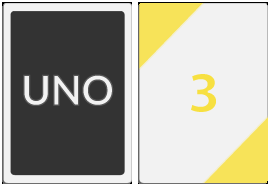

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-= SUAS CARTAS =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


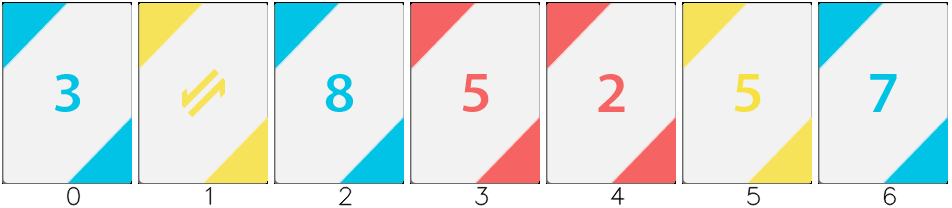

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
[3, 'azul']
['reverso', 'amarelo']
[8, 'azul']
[5, 'vermelho']
[2, 'vermelho']
[5, 'amarelo']
[7, 'azul']
Qual carta você escolhe? 9


KeyboardInterrupt: 

In [54]:
Baralho().gerar_baralho() #gera baralho
usuario = Jogadores().criar_usuario() #cria usuário
jogadores = Jogadores().gerar_jogadores(usuario) #cria jogadores
jogadores_cartas = Jogadores().dar_cartas(jogadores) #da cartas aos jogadores#
while len(jogadores_cartas[jogadores[0]]) > 0: #enquanto algum jogador tiver carta o jogo continua
    #se o jogador for usuário ou virtual define qual função seguir
    if jogadores[0] == usuario:
        Player().play(jogadores_cartas, jogadores)
    else:
        Pc().play(jogadores_cartas, jogadores)
    jogadores = Jogadores().proximo_jogador(jogadores) #passa para o próximo jogador
Acoes().quem_ganhou(jogadores_cartas, usuario) #printa resultado
